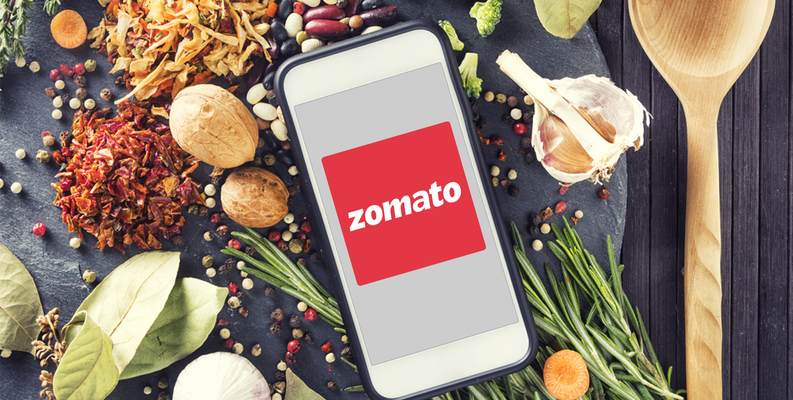

# **Project Tutorial: _Data Cleaning of the Zomato Restaurant Dataset_**

## I. **Project Description:**

**This project is focused on data cleaning of the Zomato restaurant dataset downloaded from Kaggle.** [Datasource](https://www.kaggle.com/datasets/rishikeshkonapure/zomato/data)

## 1. **Importing the Dependencies**


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("ggplot")
pd.set_option("display.max_columns", 200)
print("All libraries loaded successfully")

All libraries loaded successfully


""" Dataset Preprocessing and Cleaning Stages:
Deleting redundant columns.
Renaming the columns.
Dropping duplicates.
Cleaning individual columns.
Remove the NaN values from the dataset
Check for some more Transformations
"""

## 2. **Loading Dataset**

In [87]:
Zomato = pd.read_csv("zomato.csv") # Zomato dataset loaded

## 3. Feature Enginering Process: **_Understanding Dataset_**
 * Head or First 5 rows of data
 * Size of dataset: shape
 * Data columns
 * Data types and the number of these categorical: Nominal and Ordinal data types:
 * Information about dataset
 * Statistical description of dataset
 * Checking for NaN or missing values and sort in ascending order for clarity

### **i. Head or First 5 rows of data**

In [88]:
Zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### **ii. Size of dataset: shape**

In [89]:
Zomato.shape

(51717, 17)

#### The dataset has **51717 rows** and **17 features**

### **iii. Data columns**

In [90]:
Zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

###  **iv. Data types and the number of these categorical: Nominal and Ordinal data types:**

### Data Types:

In [91]:
Zomato.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

#### **_Observation_**: The dataset comprises of alot of object data types - strings with one int data type - votes

### Data Type Categories:

In [92]:
categorical_col = Zomato.select_dtypes(include=['object']).columns.tolist()

In [93]:
categorical_col = Zomato.select_dtypes(include=['object']).columns.tolist()

In [94]:
categorical_col

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

In [95]:
len(categorical_col) # Categorical col constitutes 16 features of the dataset

16

In [96]:
numerical_col # Numerical feature

['votes']

### **v. Information About Dataset**

In [97]:
Zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

#### **_Observation_**: The information shows the various columns with their non-null enteries or count and the data types

### **vi. Checking for NaN or missing values and sort in ascending order for clarity**

In [98]:
Zomato.isna().sum().sort_values() # Checking for NaN values

url                                0
menu_item                          0
reviews_list                       0
listed_in(type)                    0
votes                              0
listed_in(city)                    0
book_table                         0
online_order                       0
name                               0
address                            0
location                          21
cuisines                          45
rest_type                        227
approx_cost(for two people)      346
phone                           1208
rate                            7775
dish_liked                     28078
dtype: int64

### **Observation**: Missing values
* **location** - 21 missing values
* **cuisines** - 45 missing values
* **rest_type** - 227 missing values
* **approx_cost(for two people)** - 346 missing values
* **phone** - 1208 missing values
* **rate** - 7775 missing values
* **dish_liked** - 28078 missing values

## 4. Feature Enginering Process: **_First Data Cleaning Steps_**

* Deleting redundant columns.
* Renaming the columns.
* Dropping duplicates.
* Remove the NaN values from the dataset
* Cleaning individual columns.
* Check for some more Transformations

### **i. Deleting redundant columns**.

In [99]:
Zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [100]:
cols_to_keep = ['name','online_order','book_table', 'rate', 'dish_liked', 'approx_cost(for two people)']
cols_to_drop = ['url', 'address', 'phone', 'location', 'rest_type', 'cuisines', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)']

In [101]:
len(cols_to_keep)

6

In [102]:
 Zomato  = Zomato[cols_to_keep]

In [103]:
Zomato.head(5)

,name,online_order,book_table,rate,dish_liked,approx_cost(for two people)
0,Jalsa,Yes,Yes,4.1/5,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",800
1,Spice Elephant,Yes,No,4.1/5,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",800
2,San Churro Cafe,Yes,No,3.8/5,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",800
3,Addhuri Udupi Bhojana,No,No,3.7/5,Masala Dosa,300
4,Grand Village,No,No,3.8/5,"Panipuri, Gol Gappe",600


### **ii. Renaming the columns.**

In [104]:
Zomato.rename({"name":"Name", "online_order":"Online_Order", "book_table": "Book_Table", "rate":"Rate", "dish_liked":"Dish_Liked",
               "approx_cost(for two people)": "Cost_For_Two_People"}, inplace = True, axis = 1)

In [105]:
Zomato.head(5)

,Name,Online_Order,Book_Table,Rate,Dish_Liked,Cost_For_Two_People
0,Jalsa,Yes,Yes,4.1/5,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",800
1,Spice Elephant,Yes,No,4.1/5,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",800
2,San Churro Cafe,Yes,No,3.8/5,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",800
3,Addhuri Udupi Bhojana,No,No,3.7/5,Masala Dosa,300
4,Grand Village,No,No,3.8/5,"Panipuri, Gol Gappe",600


### **iii. Dropping Duplicates**

In [106]:
Zomato.duplicated(keep = 'first').value_counts()

True     32808
False    18909
Name: count, dtype: int64

#### **_Observation_**: duplicates in the dataset constitute: 32808 rows

In [107]:
Zomato.query('Name == "Jalsa"')

,Name,Online_Order,Book_Table,Rate,Dish_Liked,Cost_For_Two_People
0,Jalsa,Yes,Yes,4.1/5,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",800
456,Jalsa,Yes,Yes,4.1/5,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",800
559,Jalsa,Yes,Yes,4.1/5,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",800
2488,Jalsa,Yes,Yes,4.1/5,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",800
2966,Jalsa,Yes,Yes,4.1/5,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",800
3462,Jalsa,Yes,Yes,4.1 /5,"Pasta, Lunch Buffet, Paneer Lajawab, Masala Pa...",800
7607,Jalsa,Yes,Yes,4.2/5,"Mutton Curry, Stuffed Mushroom, Laccha Paratha...","1,500"
19401,Jalsa,Yes,Yes,4.1/5,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",800
20399,Jalsa,Yes,Yes,4.1/5,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",800
21302,Jalsa,Yes,Yes,4.1 /5,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",800


In [108]:
Zomato.drop_duplicates(keep = 'first', inplace = True)

In [109]:
Zomato.duplicated(keep = 'first').value_counts() # Checking for final duplicates

False    18909
Name: count, dtype: int64

### **iv. Removing the NaN values from the dataset**

In [110]:
Zomato.isna().sum().sort_values()

Name                       0
Online_Order               0
Book_Table                 0
Cost_For_Two_People      140
Rate                    2418
Dish_Liked             10587
dtype: int64

In [111]:
Zomato['Rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51631    3.4 /5
51632    3.3 /5
51641    3.2 /5
51677    2.5 /5
51714       NaN
Name: Rate, Length: 18909, dtype: object

In [112]:
Zomato.query('Dish_Liked == "Biryani"') # This is the most frequent occuring dish

,Name,Online_Order,Book_Table,Rate,Dish_Liked,Cost_For_Two_People
46,Kitchen Garden,Yes,No,3.6/5,Biryani,300
186,Donne Biriyani House,Yes,No,3.9/5,Biryani,400
210,Castle Rock,Yes,No,3.6/5,Biryani,700
483,Brundhavana Food Point,Yes,No,4.0/5,Biryani,300
948,Nellore Bhojanam,Yes,No,3.1/5,Biryani,250
...,...,...,...,...,...,...
47396,KKR FOODIES,Yes,Yes,3.3 /5,Biryani,400
48918,Hyderabadi Biryani Hub,Yes,No,3.4 /5,Biryani,600
48974,Hyderabadi Biriyani,Yes,No,3.3 /5,Biryani,800
50506,Andhra Biryanis,Yes,No,4.0 /5,Biryani,700


In [113]:
Zomato.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18909 entries, 0 to 51714
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 18909 non-null  object
 1   Online_Order         18909 non-null  object
 2   Book_Table           18909 non-null  object
 3   Rate                 16491 non-null  object
 4   Dish_Liked           8322 non-null   object
 5   Cost_For_Two_People  18769 non-null  object
dtypes: object(6)
memory usage: 1.0+ MB


### Dropping off all NaN values

In [114]:
Zomato.dropna(how = 'any', inplace = True)

In [115]:
Zomato.isna().sum()

Name                   0
Online_Order           0
Book_Table             0
Rate                   0
Dish_Liked             0
Cost_For_Two_People    0
dtype: int64

In [116]:
Zomato

,Name,Online_Order,Book_Table,Rate,Dish_Liked,Cost_For_Two_People
0,Jalsa,Yes,Yes,4.1/5,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",800
1,Spice Elephant,Yes,No,4.1/5,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",800
2,San Churro Cafe,Yes,No,3.8/5,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",800
3,Addhuri Udupi Bhojana,No,No,3.7/5,Masala Dosa,300
4,Grand Village,No,No,3.8/5,"Panipuri, Gol Gappe",600
...,...,...,...,...,...,...
51611,Chung Wah,No,No,2.5 /5,Manchow Soup,800
51617,Breakfast House,No,No,3.6 /5,"Coffee, Vada, Mla Dosa",300
51620,Fujian Express,Yes,No,3.8 /5,"Noodles, Chicken Noodle, Momos, American Chops...",600
51628,Nook - Aloft Bengaluru Cessna Business Park,No,Yes,4.2 /5,"Chicken Quesadilla, Naan, Breakfast Buffet, Ch...","1,800"


In [117]:
Zomato.reset_index(inplace = True) 

In [118]:
Zomato

,index,Name,Online_Order,Book_Table,Rate,Dish_Liked,Cost_For_Two_People
0,0,Jalsa,Yes,Yes,4.1/5,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",800
1,1,Spice Elephant,Yes,No,4.1/5,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",800
2,2,San Churro Cafe,Yes,No,3.8/5,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",800
3,3,Addhuri Udupi Bhojana,No,No,3.7/5,Masala Dosa,300
4,4,Grand Village,No,No,3.8/5,"Panipuri, Gol Gappe",600
...,...,...,...,...,...,...,...
8245,51611,Chung Wah,No,No,2.5 /5,Manchow Soup,800
8246,51617,Breakfast House,No,No,3.6 /5,"Coffee, Vada, Mla Dosa",300
8247,51620,Fujian Express,Yes,No,3.8 /5,"Noodles, Chicken Noodle, Momos, American Chops...",600
8248,51628,Nook - Aloft Bengaluru Cessna Business Park,No,Yes,4.2 /5,"Chicken Quesadilla, Naan, Breakfast Buffet, Ch...","1,800"


In [119]:
Zomato.drop(columns = ['index'], inplace = True)

In [120]:
Zomato

,Name,Online_Order,Book_Table,Rate,Dish_Liked,Cost_For_Two_People
0,Jalsa,Yes,Yes,4.1/5,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",800
1,Spice Elephant,Yes,No,4.1/5,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",800
2,San Churro Cafe,Yes,No,3.8/5,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",800
3,Addhuri Udupi Bhojana,No,No,3.7/5,Masala Dosa,300
4,Grand Village,No,No,3.8/5,"Panipuri, Gol Gappe",600
...,...,...,...,...,...,...
8245,Chung Wah,No,No,2.5 /5,Manchow Soup,800
8246,Breakfast House,No,No,3.6 /5,"Coffee, Vada, Mla Dosa",300
8247,Fujian Express,Yes,No,3.8 /5,"Noodles, Chicken Noodle, Momos, American Chops...",600
8248,Nook - Aloft Bengaluru Cessna Business Park,No,Yes,4.2 /5,"Chicken Quesadilla, Naan, Breakfast Buffet, Ch...","1,800"


#### **Observation**: Final Zomato dataset has **8250 rows** and **6 feature columns**

### **v. Check for some more Transformations**

In [121]:
Zomato["Rate"]

0        4.1/5
1        4.1/5
2        3.8/5
3        3.7/5
4        3.8/5
         ...  
8245    2.5 /5
8246    3.6 /5
8247    3.8 /5
8248    4.2 /5
8249    2.5 /5
Name: Rate, Length: 8250, dtype: object

In [122]:
Zomato["Rate"] = Zomato["Rate"].str.replace("/", " out of ") # Removal of / from the Rate column

In [123]:
Zomato.Rate

0        4.1 out of 5
1        4.1 out of 5
2        3.8 out of 5
3        3.7 out of 5
4        3.8 out of 5
            ...      
8245    2.5  out of 5
8246    3.6  out of 5
8247    3.8  out of 5
8248    4.2  out of 5
8249    2.5  out of 5
Name: Rate, Length: 8250, dtype: object

In [124]:
Zomato.head(5)

,Name,Online_Order,Book_Table,Rate,Dish_Liked,Cost_For_Two_People
0,Jalsa,Yes,Yes,4.1 out of 5,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",800
1,Spice Elephant,Yes,No,4.1 out of 5,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",800
2,San Churro Cafe,Yes,No,3.8 out of 5,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",800
3,Addhuri Udupi Bhojana,No,No,3.7 out of 5,Masala Dosa,300
4,Grand Village,No,No,3.8 out of 5,"Panipuri, Gol Gappe",600


### Change of data types: Online_Order and Book_Table

In [125]:
Zomato["Online_Order"] = Zomato["Online_Order"].apply(lambda x: 1 if x == "Yes" else 0)

In [126]:
Zomato["Online_Order"].head(5)

0    1
1    1
2    1
3    0
4    0
Name: Online_Order, dtype: int64

In [127]:
Zomato["Book_Table"] = Zomato["Book_Table"].apply(lambda x: 1 if x == "Yes" else 0)

In [128]:
Zomato.head(5)

,Name,Online_Order,Book_Table,Rate,Dish_Liked,Cost_For_Two_People
0,Jalsa,1,1,4.1 out of 5,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",800
1,Spice Elephant,1,0,4.1 out of 5,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",800
2,San Churro Cafe,1,0,3.8 out of 5,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",800
3,Addhuri Udupi Bhojana,0,0,3.7 out of 5,Masala Dosa,300
4,Grand Village,0,0,3.8 out of 5,"Panipuri, Gol Gappe",600


In [134]:
Zomato = Zomato.astype({"Online_Order":"boolean", "Book_Table":"boolean"})

In [135]:
Zomato.dtypes

Name                    object
Online_Order           boolean
Book_Table             boolean
Rate                    object
Dish_Liked              object
Cost_For_Two_People     object
dtype: object

In [130]:
Zomato.head(5)

,Name,Online_Order,Book_Table,Rate,Dish_Liked,Cost_For_Two_People
0,Jalsa,1,1,4.1 out of 5,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",800
1,Spice Elephant,1,0,4.1 out of 5,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",800
2,San Churro Cafe,1,0,3.8 out of 5,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",800
3,Addhuri Udupi Bhojana,0,0,3.7 out of 5,Masala Dosa,300
4,Grand Village,0,0,3.8 out of 5,"Panipuri, Gol Gappe",600


### Saving Final Cleaned Dataset

In [137]:
Zomato.to_csv("Zomato_cleaned.csv", index = False)